In [93]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
%matplotlib inline

In [62]:
tr_d = pd.read_csv('data/unimelb_training.csv', low_memory=False)
tr_d.dtypes
tr_d = tr_d.dropna(axis = 1, how='all')

In [63]:
def show_corr(dataframe):
    corr = dataframe.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

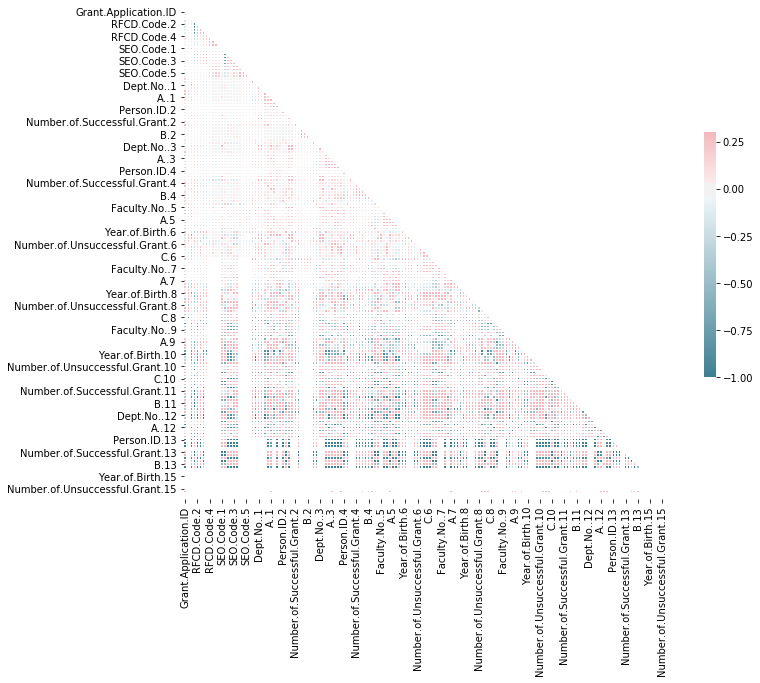

In [64]:
show_corr(tr_d)

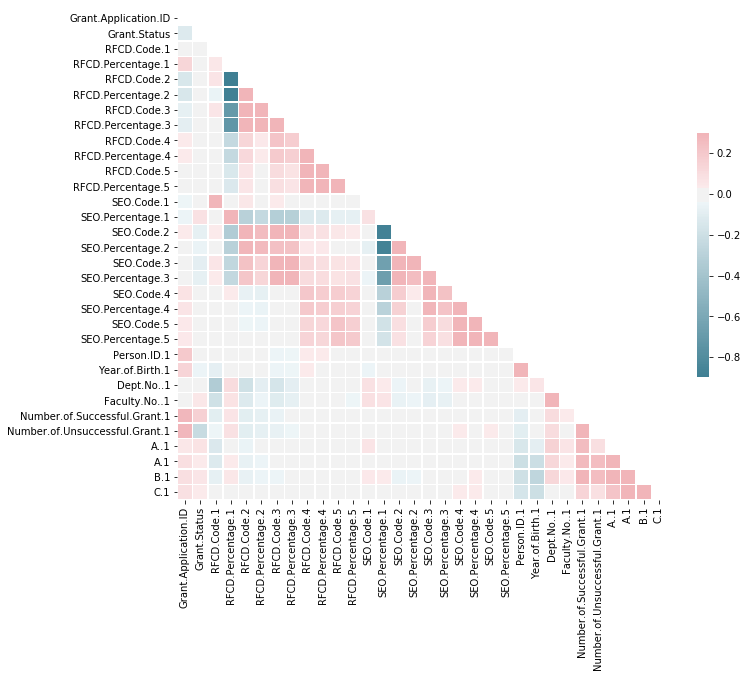

In [65]:
ntr_d = tr_d.dropna(axis=1, thresh=training_data.shape[0]//2)
show_corr(ntr_d)

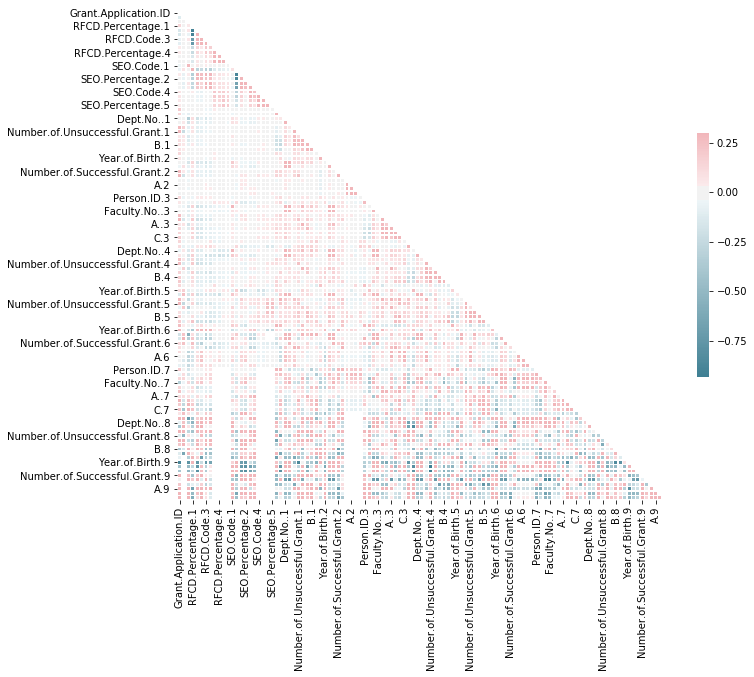

In [66]:
ntr_d_1000 = tr_d.dropna(axis=1, thresh=tr_d.shape[0]//1000)
show_corr(ntr_d_1000)

데이터 처리할 내용
---

Grant.Application.ID --> Sponsor.Code와 연관?
Grant.Status --> y_value
Sponsor.Code -->
Contract.Value.Band...see.note.A --> 홈페이지에 있는 평균값으로 변경?
Start.date --> 날짜는 Year, Month, Date로 나눠서?
RFCD.Code --> 분야별로 잘라서 봐야 할 듯함 Code를 그냥 값으로 이용하기에는 부적절해 보임
RFCD.Percentage --> if there are several RFCD codes that are relevant to a project ...???
SEO.Code --> 분야별로 잘라서 봐야 할 듯함 RFCD.Code랑 비슷
SEO.Percentage --> if there are several SEO codes that are relevant to a project ...???



사람 개별 데이터
저널 수 (A.., A., B., C.) --> 모든 사람들의 합? 평균?
날짜 데이터 정리


In [75]:
tr_d.columns.values

array(['Grant.Application.ID', 'Grant.Status', 'Sponsor.Code',
       'Grant.Category.Code', 'Contract.Value.Band...see.note.A',
       'Start.date', 'RFCD.Code.1', 'RFCD.Percentage.1', 'RFCD.Code.2',
       'RFCD.Percentage.2', 'RFCD.Code.3', 'RFCD.Percentage.3',
       'RFCD.Code.4', 'RFCD.Percentage.4', 'RFCD.Code.5',
       'RFCD.Percentage.5', 'SEO.Code.1', 'SEO.Percentage.1', 'SEO.Code.2',
       'SEO.Percentage.2', 'SEO.Code.3', 'SEO.Percentage.3', 'SEO.Code.4',
       'SEO.Percentage.4', 'SEO.Code.5', 'SEO.Percentage.5', 'Person.ID.1',
       'Role.1', 'Year.of.Birth.1', 'Country.of.Birth.1',
       'Home.Language.1', 'Dept.No..1', 'Faculty.No..1', 'With.PHD.1',
       'No..of.Years.in.Uni.at.Time.of.Grant.1',
       'Number.of.Successful.Grant.1', 'Number.of.Unsuccessful.Grant.1',
       'A..1', 'A.1', 'B.1', 'C.1', 'Person.ID.2', 'Role.2',
       'Year.of.Birth.2', 'Country.of.Birth.2', 'Home.Language.2',
       'Dept.No..2', 'Faculty.No..2', 'With.PHD.2',
       'No..of.Year

In [74]:
tr_d['RFCD.Percentage.1']

0       100.0
1        30.0
2        60.0
3        50.0
4        34.0
5       100.0
6        50.0
7       100.0
8        50.0
9        40.0
10       60.0
11       20.0
12      100.0
13       51.0
14       40.0
15      100.0
16       33.0
17       33.0
18       40.0
19      100.0
20       20.0
21      100.0
22       40.0
23       60.0
24      100.0
25        NaN
26        NaN
27      100.0
28       50.0
29       60.0
        ...  
8678    100.0
8679     10.0
8680    100.0
8681     50.0
8682    100.0
8683     80.0
8684     50.0
8685    100.0
8686    100.0
8687    100.0
8688     40.0
8689     50.0
8690     50.0
8691    100.0
8692     60.0
8693     50.0
8694     50.0
8695     51.0
8696    100.0
8697      NaN
8698    100.0
8699     70.0
8700     30.0
8701    100.0
8702      NaN
8703    100.0
8704     50.0
8705      NaN
8706     40.0
8707     70.0
Name: RFCD.Percentage.1, Length: 8708, dtype: float64

In [113]:
def class_list(dataframe, artclass):
    r = re.compile('^' + artclass + '[.]\d+$')
    s = [i for i in list(dataframe) if r.match(i)]
    return s

In [117]:
for cls in ['A.', 'A', 'B', 'C']:
    tr_d[cls] = tr_d[class_list(tr_d, cls)].sum(axis = 1)

In [121]:
tr_d[['A.', 'A', 'B', 'C']]
tr_d['artSum'] = tr_d[['A.', 'A', 'B', 'C']].sum(axis = 1)

In [123]:
article_sum = tr_d[['Grant.Status', 'A.', 'A', 'B', 'C', 'artSum']].corr()

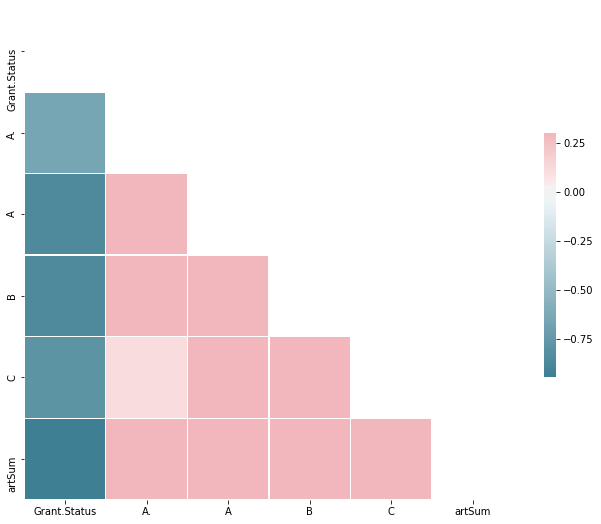

In [124]:
show_corr(article_sum)

In [125]:
article_sum

,Grant.Status,A.,A,B,C,artSum
Grant.Status,1.000000,0.078419,0.032555,0.046621,0.017342,0.057722
A.,0.078419,1.000000,0.601313,0.465223,0.316662,0.791025
A,0.032555,0.601313,1.000000,0.701204,0.532509,0.899375
B,0.046621,0.465223,0.701204,1.000000,0.690445,0.842632
C,0.017342,0.316662,0.532509,0.690445,1.000000,0.696080
artSum,0.057722,0.791025,0.899375,0.842632,0.696080,1.000000


In [129]:
tr_d.corr()['Grant.Status'].sort_values(ascending=False)

C.8                               -0.634811
Number.of.Unsuccessful.Grant.8    -0.507178
C.7                               -0.390494
B.7                               -0.267241
Number.of.Unsuccessful.Grant.5    -0.259689
Number.of.Unsuccessful.Grant.1    -0.233755
Number.of.Unsuccessful.Grant.2    -0.187708
A.7                               -0.172384
B.8                               -0.149236
Number.of.Unsuccessful.Grant.3    -0.148800
B.6                               -0.132521
Number.of.Unsuccessful.Grant.4    -0.121114
Grant.Application.ID              -0.118442
C.4                               -0.104341
C.6                               -0.102988
SEO.Code.3                        -0.087735
C.5                               -0.086148
SEO.Code.2                        -0.075169
Year.of.Birth.4                   -0.073582
SEO.Percentage.3                  -0.071123
A.5                               -0.061227
Person.ID.3                       -0.055213
SEO.Percentage.2                